In [1]:
#import cupy as cp
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
from wikipedia2vec import Wikipedia2Vec

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

np.random.seed(4)
vectorDim = 100

numNode = 100

inputDataTraining = np.load('./trainingData_averaging/inputDataTraining_4k_average.npy')
outputDataTraining = np.load('./trainingData_averaging/outputDataTraining_4k_average.npy')
print(len(inputDataTraining))
print(len(outputDataTraining))

Using Numpy backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PeterDell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1526309
1526309


In [2]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [3]:
# leakingRate=0.2 changing too fast, mutliple with 0.05; changed
esn = PredictionESN(n_input=vectorDim, n_output=vectorDim, n_reservoir=numNode, leakingRate=0.05, regressionParameters=[1e-2], solver="lsqr", feedback=False)

In [4]:
#reservoirStatesBuffer[:,:resn]

in_small = inputDataTraining[:10000]
out_small = outputDataTraining[:10000]

print(len(in_small))
print(len(out_small))

10000
10000


In [5]:


esn.fit(in_small, out_small, transientTime="Auto", verbose=1)
#esn.fit(inputDataTraining[:,:1000], outputDataTraining[:,:1000], transientTime="Auto", verbose=1)

100% (9601 of 9601) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


0.04847913004712163

In [6]:
wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')



In [7]:
#read in the narrative

huge_list = []

with open("iss_gatsby_bond_archology-long.txt", "r") as f:
    huge_list = f.read().split()

#print(huge_list)   

discourse_words = huge_list

In [8]:
# clean it up
# large capital -> small capital

discourse_words = [s.replace(s, s.lower()) for s in discourse_words]

    # remove '.' and ',' from word list
discourse_words = [s.replace('.', '') for s in discourse_words]
discourse_words = [s.replace(',', '') for s in discourse_words]

    # remove stop words from word list
stop_words = stopwords.words('english')
    #print(stop_words)
for stop_word in stop_words:
    while stop_word in discourse_words :
        discourse_words.remove(stop_word)
            
            
    # remove "'s" and "'" and "-" and "'d" and "'ll" and "'ve" and "re" from word list
discourse_words = [s.replace("'s", '') for s in discourse_words]
discourse_words = [s.replace("'", '') for s in discourse_words]
discourse_words = [s.replace("-", ' ') for s in discourse_words]
discourse_words = [s.replace("'d", '') for s in discourse_words]
discourse_words = [s.replace("'ll", '') for s in discourse_words]
discourse_words = [s.replace("'ve", '') for s in discourse_words]
discourse_words = [s.replace("'re", '') for s in discourse_words]
discourse_words = [s.replace("(", '') for s in discourse_words]
discourse_words = [s.replace(")", '') for s in discourse_words]
discourse_words = [s.replace("[", '') for s in discourse_words]
discourse_words = [s.replace("]", '') for s in discourse_words]
discourse_words = [s.replace(",", '') for s in discourse_words]

#print(discourse_words)

In [9]:
inputDataTesting = np.empty((0,vectorDim))
print(inputDataTesting.shape)

for num in range(len(discourse_words)):
    inputDataTesting = np.append(inputDataTesting, np.array([wiki2vec.get_word_vector(discourse_words[num])]), axis=0)
    print(discourse_words[num], num, end = ' ')
print(inputDataTesting.shape)

(0, 100)
international 0 space 1 station 2 iss 3 modular 4 space 5 station 6 habitable 7 artificial 8 satellite 9 low 10 earth 11 orbit 12 multinational 13 collaborative 14 project 15 involving 16 five 17 participating 18 space 19 agencies 20 nasa 21 united 22 states 23 roscosmos 24 russia 25 jaxa 26 japan 27 esa 28 europe 29 csa 30 canada 31 ownership 32 use 33 space 34 station 35 established 36 intergovernmental 37 treaties 38 agreements 39 station 40 serves 41 microgravity 42 space 43 environment 44 research 45 laboratory 46 scientific 47 research 48 conducted 49 astrobiology 50 astronomy 51 meteorology 52 physics 53 fields 54 iss 55 suited 56 testing 57 spacecraft 58 systems 59 equipment 60 required 61 possible 62 future 63 long 64 duration 65 missions 66 moon 67 mars 68 iss 69 programme 70 evolved 71 space 72 station 73 freedom 74 american 75 proposal 76 conceived 77 1984 78 construct 79 permanently 80 manned 81 earth 82 orbiting 83 station 84 contemporaneous 85 soviet 86 russian 

In [10]:
reservoirStatesBuffer = np.empty((0,numNode))
prediction,reservoirStatesBuffer  = esn.predict(inputDataTesting)
reservoirStatesBuffer = reservoirStatesBuffer.T
print(reservoirStatesBuffer.shape)
reservoirStatesBuffer = reservoirStatesBuffer[:,101:]
print(reservoirStatesBuffer.shape)
print(prediction.shape)

(629, 201)
(629, 100)
(629, 100)


In [11]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import csv

import scipy
from scipy import stats


In [12]:

sim_matrix = np.empty([len(reservoirStatesBuffer),len(reservoirStatesBuffer)])


for i in range(len(reservoirStatesBuffer)):
    for j in range(len(reservoirStatesBuffer)):
        sim_matrix[i,j] = 0
        
print(len(reservoirStatesBuffer[1]))
np.save('Exp1-IGBA-states.npy', reservoirStatesBuffer)

100


In [13]:
for i in range(len(reservoirStatesBuffer)):
    for j in range(len(reservoirStatesBuffer)):
        sim_matrix[i,j] = cos_sim(reservoirStatesBuffer[i],reservoirStatesBuffer[j])
            

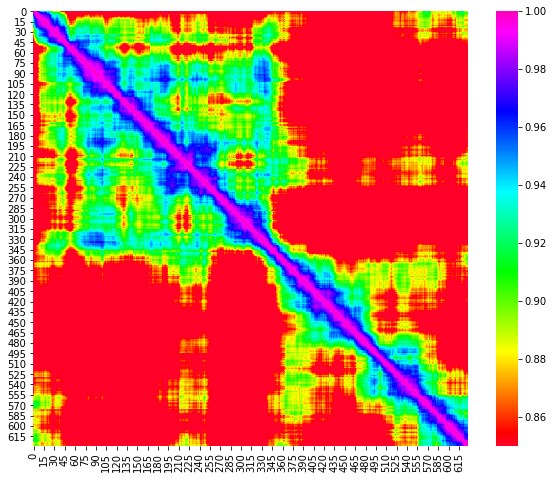

In [14]:
fig= plt.figure(figsize=(10,8))
plt.subplot(111)
# plasma YlGnBu twilight gist_rainbow
#sns.heatmap(similarity_matrix, annot=True, square=True, cmap='YlGnBu')
sns.heatmap(sim_matrix, square=True, cmap='gist_rainbow', vmin=0.85, vmax=1)
#sns.heatmap(sim_matrix, square=True)
#ax.set_ylim(len(sim_matrix), 0)
plt.savefig('reservoirstates-igba.png', dpi=600)